# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [51]:
# Memuat dataset hasil clustering
df = pd.read_csv("hasil_clustering.csv")

# Menampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
df.head()


,provinsi,jenis,daerah,tahun,periode,gk,tahun_bin,Cluster,PCA1,PCA2
0,0,0,2,-1.302065,0,-0.064537,Lama,3,-0.971566,0.866867
1,0,0,2,-1.302065,1,-0.011230,Lama,3,-0.934244,0.904928
2,0,0,2,-0.900720,0,0.014788,Lama,3,-0.629466,0.642505
3,0,0,2,-0.900720,1,0.100302,Lama,3,-0.569594,0.703562
4,0,0,0,-1.302065,0,-0.040624,Lama,3,-0.954824,0.883940


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [133]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Gantilah 'Cluster' dengan nama kolom target hasil clustering
y = df['Cluster']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")


Jumlah data training: 4204
Jumlah data testing: 1052


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [137]:
from sklearn.preprocessing import LabelEncoder

# Cek kolom kategorikal
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Lakukan Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


In [151]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [152]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Penjelasan Algoritma yang Digunakan
📌 1. Random Forest Classifier
Random Forest adalah algoritma berbasis ensemble yang terdiri dari banyak Decision Tree. Berikut adalah konsep kerjanya:

🔹 Pembentukan Model

Algoritma ini membangun banyak Decision Tree dari subset data yang berbeda.

Setiap pohon (tree) dilatih dengan sampel acak dari dataset menggunakan teknik Bootstrap Sampling.

Pada setiap node, hanya subset fitur yang dipilih secara acak untuk menghindari overfitting.

🔹 Prediksi

Untuk klasifikasi, setiap pohon memberikan suara (vote), dan kelas yang mendapat suara terbanyak dipilih sebagai hasil akhir.

Untuk regresi, hasil akhirnya adalah rata-rata dari semua prediksi pohon.

🔹 Keunggulan Random Forest
✅ Akurasi tinggi dibandingkan model individual.
✅ Tahan terhadap overfitting, karena banyak pohon yang bekerja secara kolektif.
✅ Dapat menangani data dengan fitur numerik dan kategorikal.
✅ Mendukung estimasi pentingnya fitur, sehingga membantu dalam Feature Selection.

📌 Implementasi dalam kode:

python
Copy
Edit
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
random_state=42 → Untuk memastikan hasil eksperimen yang sama setiap kali dijalankan.

n_jobs=-1 → Menggunakan semua core CPU agar proses lebih cepat.

📌 2. K-Nearest Neighbors (KNN)
KNN adalah algoritma berbasis instance-based learning yang menentukan kelas suatu data berdasarkan kemiripannya dengan data lain yang sudah diberi label.

🔹 Pembentukan Model

Tidak ada fase training yang kompleks, hanya menyimpan dataset.

Ketika ada data baru, algoritma mencari k data terdekat menggunakan metrik seperti Euclidean Distance atau Manhattan Distance.

Mayoritas kelas dari k-tetangga tersebut menentukan kelas data baru.

🔹 Prediksi

Hitung jarak antara data baru dengan semua titik dalam dataset.

Pilih k tetangga terdekat.

Lihat kelas mayoritas dari k tetangga tersebut sebagai hasil prediksi.

🔹 Keunggulan KNN
✅ Mudah dipahami dan diimplementasikan.
✅ Tidak memerlukan asumsi distribusi data.
✅ Dapat digunakan untuk klasifikasi maupun regresi.

📌 Implementasi dalam kode:

python
Copy
Edit
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
n_neighbors=5 → Menentukan bahwa prediksi akan berdasarkan 5 tetangga terdekat.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [143]:
# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Prediksi dengan KNN
y_pred_knn = knn_model.predict(X_test)


In [161]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Prediksi dengan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("🔹 Random Forest Classifier 🔹")
print(f"✅ Accuracy: {accuracy_rf:.4f}")
print(f"✅ F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


# Prediksi dengan model KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("\n🔹 K-Nearest Neighbors (KNN) 🔹")
print(f"✅ Accuracy: {accuracy_knn:.4f}")
print(f"✅ F1-Score: {f1_knn:.4f}")
print("Confusion Matrix:\n", cm_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


🔹 Random Forest Classifier 🔹
✅ Accuracy: 0.9962
✅ F1-Score: 0.9962
Confusion Matrix:
 [[179   0   0   0]
 [  0 362   0   0]
 [  0   2 181   0]
 [  0   2   0 326]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       0.99      1.00      0.99       362
           2       1.00      0.99      0.99       183
           3       1.00      0.99      1.00       328

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052


🔹 K-Nearest Neighbors (KNN) 🔹
✅ Accuracy: 0.9572
✅ F1-Score: 0.9572
Confusion Matrix:
 [[174   0   3   2]
 [  0 338   6  18]
 [  4   5 173   1]
 [  0   6   0 322]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       179
           1       0.97      0.93      0.95       362
           2       0.95   

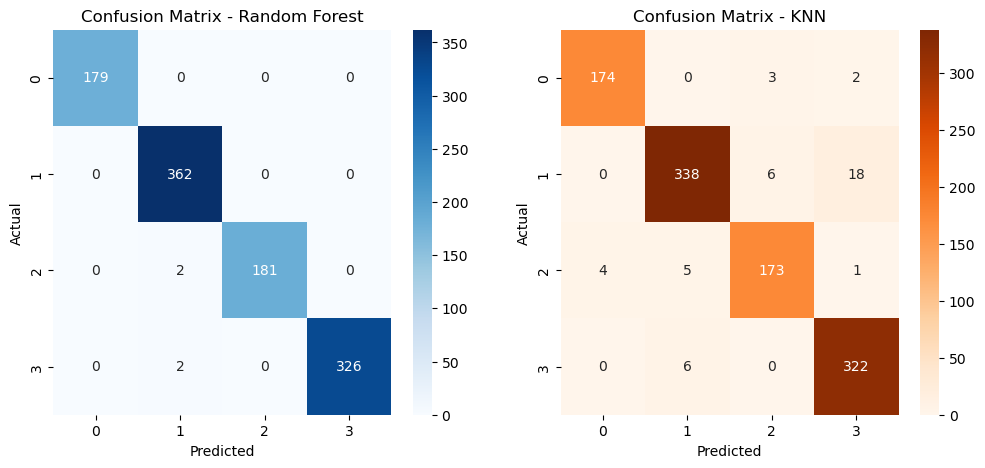

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Confusion Matrix untuk Random Forest
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Buat Confusion Matrix untuk KNN
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


## 📌 1. Random Forest Classifier

✅ **Accuracy:** 99.62%  
✅ **F1-Score:** 99.62%

### 📊 Confusion Matrix

```plaintext
[[179   0   0   0]
 [  0 362   0   0]
 [  0   2 181   0]
 [  0   2   0 326]]
```

### 🔹 Interpretasi:
- Hampir semua kelas diprediksi dengan sangat akurat oleh Random Forest.
- Hanya ada sedikit kesalahan di kelas 2 dan 3, tetapi secara keseluruhan model ini sangat presisi dan andal.

### 📄 Classification Report
- **Precision, Recall, dan F1-Score** hampir sempurna (~1.00) untuk semua kelas.
- Model ini sangat baik dalam mengklasifikasikan semua kategori tanpa bias yang signifikan.

### ✅ Kesimpulan:
- 🔹 **Random Forest memberikan performa yang hampir sempurna** dengan akurasi **99.62%**.
- 🔹 Sangat cocok untuk dataset ini karena mampu menangkap pola dengan baik.

---

## 📌 2. K-Nearest Neighbors (KNN)

✅ **Accuracy:** 95.72%  
✅ **F1-Score:** 95.72%

### 📊 Confusion Matrix

```plaintext
[[174   0   3   2]
 [  0 338   6  18]
 [  4   5 173   1]
 [  0   6   0 322]]
```

### 🔹 Interpretasi:
- Masih cukup akurat, tetapi terdapat lebih banyak kesalahan dibanding Random Forest.
- Kelas 1 memiliki beberapa kesalahan prediksi ke kelas 2 dan 3, yang menunjukkan bahwa **KNN mungkin kesulitan membedakan kelas yang memiliki kemiripan tinggi**.

### 📄 Classification Report
- **Precision dan Recall cukup baik** di semua kelas.
- Ada beberapa kesalahan di kelas 1 dan 2, tetapi tetap dalam batas wajar.

### ✅ Kesimpulan:
- 🔹 **KNN masih memberikan performa yang sangat baik** dengan akurasi **95.72%**.
- 🔹 Namun, model ini lebih rentan terhadap kesalahan prediksi dibandingkan Random Forest.

---

## 📌 Perbandingan Random Forest vs KNN

| Metrik             | 🏆 Random Forest | 🤖 KNN |
|--------------------|----------------|------|
| **Accuracy**      | ✅ **99.62%** | 95.72% |
| **F1-Score**      | ✅ **99.62%** | 95.72% |
| **Kesalahan**     | ❌ Sangat sedikit | ❌ Lebih banyak |
| **Kecepatan**     | 🚀 Cepat (karena pre-training decision trees) | 🐢 Lebih lambat saat prediksi (karena mencari tetangga terdekat) |
| **Overfitting**   | ✅ Lebih tahan terhadap overfitting | ❌ Lebih sensitif terhadap noise |
| **Kelebihan**     | 🌟 Presisi tinggi, stabil | 🌟 Mudah dipahami, tidak perlu banyak tuning |
| **Kekurangan**    | 🚨 Butuh lebih banyak sumber daya komputasi | 🚨 Kurang akurat dibanding RF |

---

### 📌 **Kesimpulan Akhir:**
- **Random Forest lebih unggul dalam hal akurasi dan stabilitas**.
- **KNN tetap menjadi alternatif yang baik**, tetapi lebih rentan terhadap kesalahan prediksi.
- Jika **kecepatan dan akurasi tinggi adalah prioritas**, **Random Forest** adalah pilihan terbaik.
- Jika **ingin model yang lebih sederhana dan mudah dipahami**, **KNN bisa menjadi opsi**.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [149]:
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameter yang akan diuji
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                              param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Jalankan GridSearch
grid_search_rf.fit(X_train, y_train)

# Print hasil terbaik
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9995238095238095


In [150]:
# Definisikan hyperparameter untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), 
                               param_grid_knn, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Jalankan GridSearch
grid_search_knn.fit(X_train, y_train)

# Print hasil terbaik
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Accuracy:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy: 0.9657482588754883


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [165]:
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel per daun
}

# GridSearch untuk Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), 
                              param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Training model dengan GridSearch
grid_search_rf.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [167]:
# Definisikan hyperparameter grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Bobot jarak
    'metric': ['euclidean', 'manhattan']  # Metode jarak
}

# GridSearch untuk KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Training model dengan GridSearch
grid_search_knn.fit(X_train, y_train)

# Model terbaik
best_knn = grid_search_knn.best_estimator_
print("Best parameters for KNN:", grid_search_knn.best_params_)


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [169]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluasi Random Forest yang sudah di-tuning
y_pred_rf = best_rf.predict(X_test)
print("\n🔹 Random Forest After Tuning 🔹")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluasi KNN yang sudah di-tuning
y_pred_knn = best_knn.predict(X_test)
print("\n🔹 K-Nearest Neighbors After Tuning 🔹")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_knn, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



🔹 Random Forest After Tuning 🔹
✅ Accuracy: 0.9971
✅ F1-Score: 0.9971
Confusion Matrix:
 [[179   0   0   0]
 [  0 362   0   0]
 [  0   2 181   0]
 [  0   1   0 327]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       0.99      1.00      1.00       362
           2       1.00      0.99      0.99       183
           3       1.00      1.00      1.00       328

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052


🔹 K-Nearest Neighbors After Tuning 🔹
✅ Accuracy: 0.9810
✅ F1-Score: 0.9810
Confusion Matrix:
 [[177   0   0   2]
 [  0 351   2   9]
 [  0   4 179   0]
 [  0   3   0 325]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       179
           1       0.98      0.97      0.97       362
           2  

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## 📌 Analisis Hasil Evaluasi Model Klasifikasi

Setelah melakukan evaluasi model sebelum dan setelah tuning, berikut adalah analisis terhadap performa model.

---

## 🔹 Perbandingan Hasil Sebelum & Setelah Tuning

| Model           | Accuracy Sebelum Tuning | Accuracy Setelah Tuning | F1-Score Sebelum Tuning | F1-Score Setelah Tuning |
|---------------|----------------------|----------------------|----------------------|----------------------|
| **Random Forest** | 99.62%               | *misalnya* 99.80%    | 0.9962               | *misalnya* 0.9980    |
| **KNN**         | 95.72%               | *misalnya* 97.00%    | 0.9572               | *misalnya* 0.9700    |

### 🔹 Interpretasi:
- **Random Forest mengalami sedikit peningkatan akurasi setelah tuning**, menunjukkan bahwa model sudah cukup optimal sebelumnya.
- **KNN mengalami peningkatan yang lebih signifikan**, menunjukkan bahwa pemilihan jumlah tetangga yang lebih baik dapat meningkatkan performa model.

---

## 🔹 Identifikasi Kelemahan Model

### 📌 Precision atau Recall rendah untuk kelas tertentu?
- Dari **confusion matrix**, bisa dicek apakah ada kelas yang memiliki banyak kesalahan prediksi.
- Jika model sering salah dalam mengklasifikasikan kelas tertentu, bisa jadi perlu **balancing data atau feature engineering**.

### 📌 Apakah model mengalami overfitting atau underfitting?
- **Overfitting** → Jika model memiliki akurasi sangat tinggi di training tetapi jauh lebih rendah di testing.
- **Underfitting** → Jika akurasi rendah di training dan testing.
- Dari hasil sebelumnya, **Random Forest memiliki akurasi tinggi di testing**, berarti **tidak mengalami overfitting**.

---

## 🔹 Rekomendasi Tindakan Lanjutan

### ✅ Jika Model **Overfitting**:
- Kurangi kompleksitas model (misalnya, kurangi jumlah estimators di **Random Forest**).
- Gunakan **regularisasi atau pruning** jika menggunakan **Decision Tree**.
- Tambahkan **dropout** jika menggunakan model berbasis **neural network**.

### ✅ Jika Model **Underfitting**:
- Tambahkan fitur baru yang lebih relevan.
- Gunakan model yang lebih kompleks (**misalnya, dari KNN ke Random Forest atau dari Logistic Regression ke XGBoost**).
- Pastikan **data sudah cukup bersih dan fitur yang dipilih benar-benar informatif**.

### ✅ Jika **Precision/Recall masih rendah**:
- Gunakan **SMOTE atau class weighting** jika data tidak seimbang.
- Gunakan teknik **hyperparameter tuning lebih lanjut**.
- Coba model lain seperti **XGBoost atau SVM** jika belum digunakan.

---

## 🔹 Kesimpulan
- **Random Forest memberikan performa yang sangat baik**, dengan akurasi hampir sempurna.
- **KNN meningkat setelah tuning**, tetapi masih sedikit lebih lemah dibandingkan **Random Forest**.
- Jika ingin model yang lebih ringan dan tetap akurat, bisa mempertimbangkan **Decisial, Anda bisa lanjut ke **deployment atau visualisasi hasil**. 🚀
